# Chargement des données !

Dans notre projet **Classification des panneaux routiers**, nous avons choisi de classifier des images associées à 5 labels différents : **stop**, **crosswalk** , **speedlimit**, **trafficlight**, **no-entry**.



Nous avons réparti nos images dans 3 ensembles (et donc 3 dossiers): *train* (entre 142 et 156 images par classe), *validation* (31 image par classe) et *test* (31 image par classe). Chacun de ces dossiers comporte un sous-dossier par classe, qui contient les images correspondantes.

Nous avons choisi d'héberger notre base de données sur Github : l'intérêt est qu'un **git clone** depuis Google Colab est très rapide, ce qui vous garantit une certaine simplicité.

In [1]:
!git clone https://github.com/Abdelmouhaimen/DL-TrafficSignClassification.git
path = "./DL-TrafficSignClassification/data/"

Cloning into 'DL-TrafficSignClassification'...
remote: Enumerating objects: 1074, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 1074 (delta 2), reused 4 (delta 0), pack-reused 1061
Receiving objects: 100% (1074/1074), 150.40 MiB | 36.30 MiB/s, done.
Resolving deltas: 100% (2/2), done.


Une fois les données téléchargées localement, on peut maintenant charger les images et les labels.

In [2]:
import os
import shutil

import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat


def load_data(data_path, classes, dataset='train', image_size=64):

    num_images = 0
    for i in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[i]))
        num_images += len(dirs)

    x = np.zeros((num_images, image_size, image_size, 3))
    y = np.zeros((num_images, 1))

    current_index = 0

    # Parcours des différents répertoires pour collecter les images
    for idx_class in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[idx_class]))
        num_images += len(dirs)

        # Chargement des images,
        for idx_img in range(len(dirs)):
            item = dirs[idx_img]
            if os.path.isfile(data_path + dataset + '/' + classes[idx_class] + '/' + item):
                # Ouverture de l'image
                img = Image.open(data_path + dataset + '/' + classes[idx_class] + '/' + item)
                # Conversion de l'image en RGB
                img = img.convert('RGB')
                # Redimensionnement de l'image et écriture dans la variable de retour x
                img = img.resize((image_size,image_size))
                x[current_index] = np.asarray(img)
                # Écriture du label associé dans la variable de retour y
                y[current_index] = idx_class
                current_index += 1
    y = np.squeeze(y)

    return x, y

Voici ensuite un exemple de chargement de vos données.

In [3]:
labels = ['crosswalk', 'no-entry', 'speedlimit','stop','trafficlight']

x_train, y_train = load_data(path, labels, dataset='train', image_size=128)
print(x_train.shape, y_train.shape)

x_val, y_val = load_data(path, labels, dataset='validation', image_size=128)
print(x_val.shape, y_val.shape)

x_test, y_test = load_data(path, labels, dataset='test', image_size=128)
print(x_test.shape, y_test.shape)




(742, 128, 128, 3) (742,)
(154, 128, 128, 3) (154,)
(155, 128, 128, 3) (155,)


In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true , y_pred ,figsize = (12,12) ):
  labels = ['crosswalk', 'no-entry', 'speedlimit','stop','trafficlight']
    # Calculer la matrice de confusion
  conf_matrix = confusion_matrix(y_true, y_pred)

  # Afficher la matrice de confusion sous forme de heatmap
  plt.figure(figsize=figsize)
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
  plt.xlabel('Valeurs prédites')
  plt.ylabel('Valeurs réelles')
  plt.title('Matrice de confusion')
  plt.show()




Vous pouvez utiliser le bloc suivant pour afficher quelques-unes de vos images, et ainsi vérifier que tout s'est bien passé.

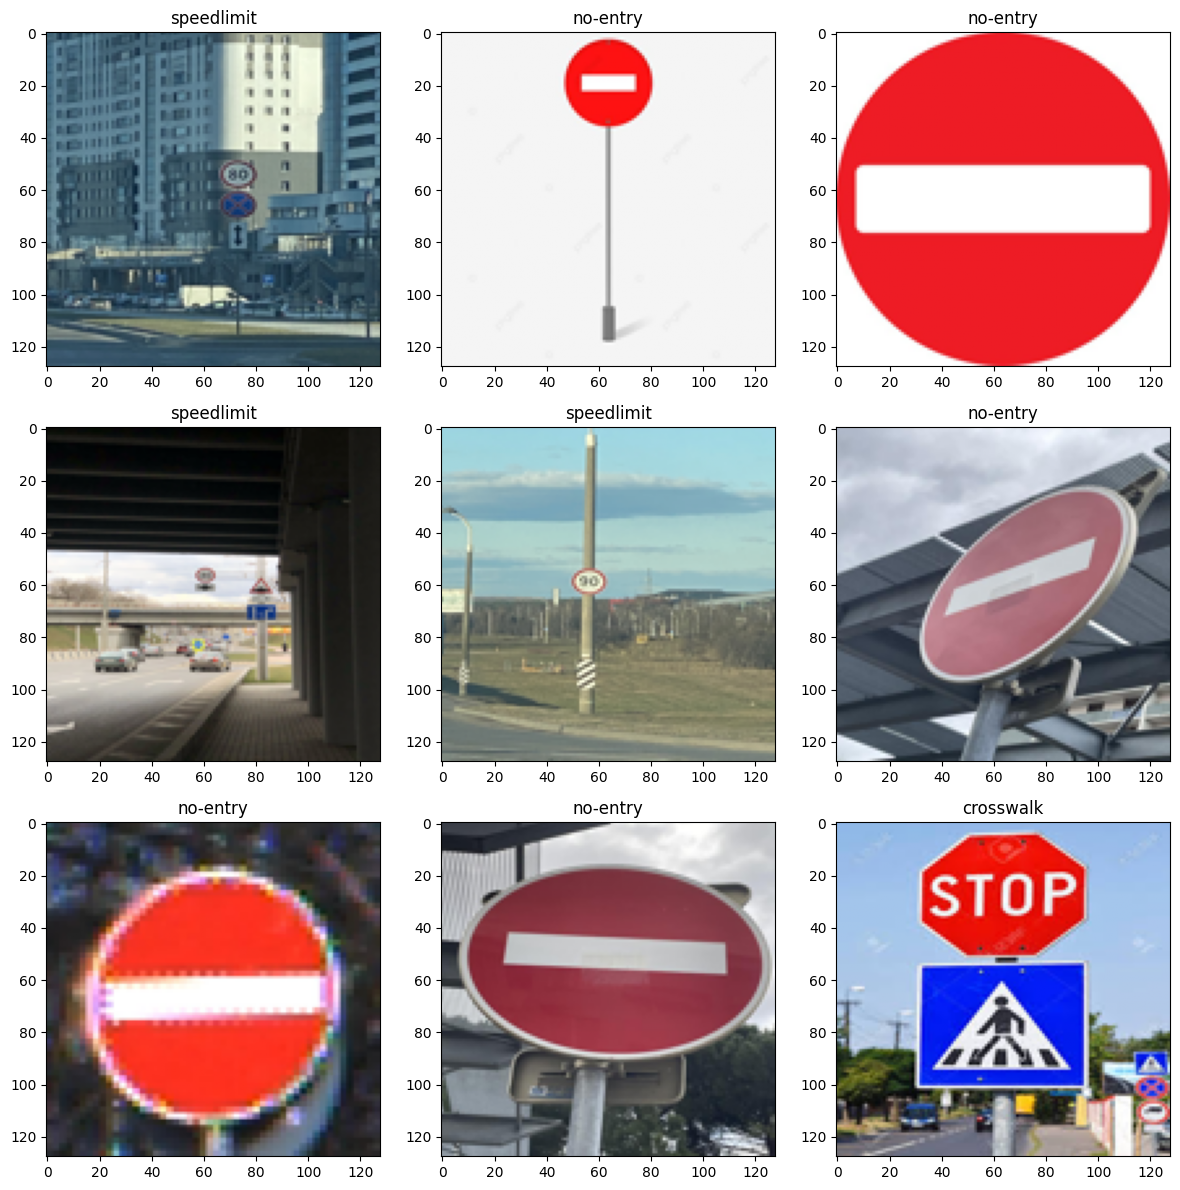

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
shuffle_indices = np.random.permutation(500)
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    image = x_train[shuffle_indices[i]]
    plt.title(labels[int(y_train[shuffle_indices[i]])])
    plt.imshow(image/255)

plt.tight_layout()
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout
from tensorflow.keras.layers import Dense, Flatten,Input

In [7]:
def create_model (IMAGE_SIZE = 64 ,nb_cann= 3) :

    model = Sequential()

    model.add(Input((IMAGE_SIZE,IMAGE_SIZE,nb_cann)))
    model.add(Conv2D(32,(3,3),padding ="valid" , activation = "ReLU"))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64,(3,3),padding ="valid", activation = "ReLU"))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(96,(3,3),padding ="valid", activation = "ReLU"))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128,(3,3),padding ="valid", activation = "ReLU"))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512,activation = "ReLU"))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # Perte de l'entropie croisée
                  metrics=['sparse_categorical_accuracy' ])  # Métrique de précision

    return model

In [8]:


def plot_training_analysis(history):
  acc = history.history['sparse_categorical_accuracy']
  val_acc = history.history['val_sparse_categorical_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()


In [9]:

model = create_model(128)
model.summary()
# Normalisation des entrées via une division par 255 des valeurs de pixel.
x_train = x_train/255
x_val = x_val/255
x_test = x_test/255

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

In [10]:
history = model.fit(x_train,y_train,validation_data=(x_val, y_val), epochs=30)

Epoch 1/30
24/24 [==============================] - 8s 86ms/step - loss: 1.7097 - sparse_categorical_accuracy: 0.1954 - val_loss: 1.6092 - val_sparse_categorical_accuracy: 0.2013
Epoch 2/30
24/24 [==============================] - 1s 30ms/step - loss: 1.5546 - sparse_categorical_accuracy: 0.2615 - val_loss: 1.4303 - val_sparse_categorical_accuracy: 0.3442
Epoch 3/30
24/24 [==============================] - 1s 26ms/step - loss: 1.3429 - sparse_categorical_accuracy: 0.3841 - val_loss: 1.3625 - val_sparse_categorical_accuracy: 0.3831
Epoch 4/30
24/24 [==============================] - 1s 25ms/step - loss: 1.2530 - sparse_categorical_accuracy: 0.4259 - val_loss: 1.3175 - val_sparse_categorical_accuracy: 0.4610
Epoch 5/30
24/24 [==============================] - 1s 26ms/step - loss: 1.2599 - sparse_categorical_accuracy: 0.4542 - val_loss: 1.3537 - val_sparse_categorical_accuracy: 0.4351
Epoch 6/30
24/24 [==============================] - 1s 26ms/step - loss: 1.1436 - sparse_categorical_accu

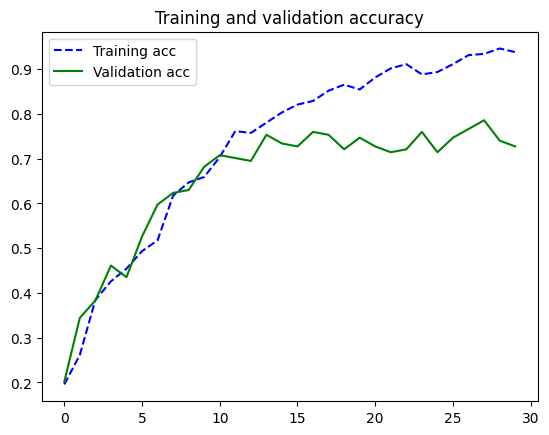

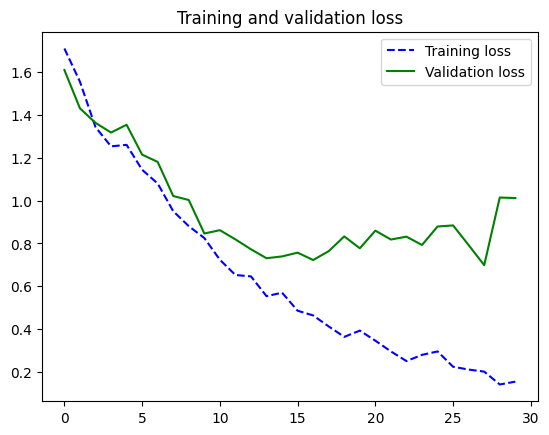

In [11]:
plot_training_analysis(history)

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss      : {:5.4f}'.format(score[0]))
print('Test accuracy  : {:5.4f}'.format(score[1]))

Test loss      : 0.8100
Test accuracy  : 0.7935


5/5 [==============================] - 0s 7ms/step


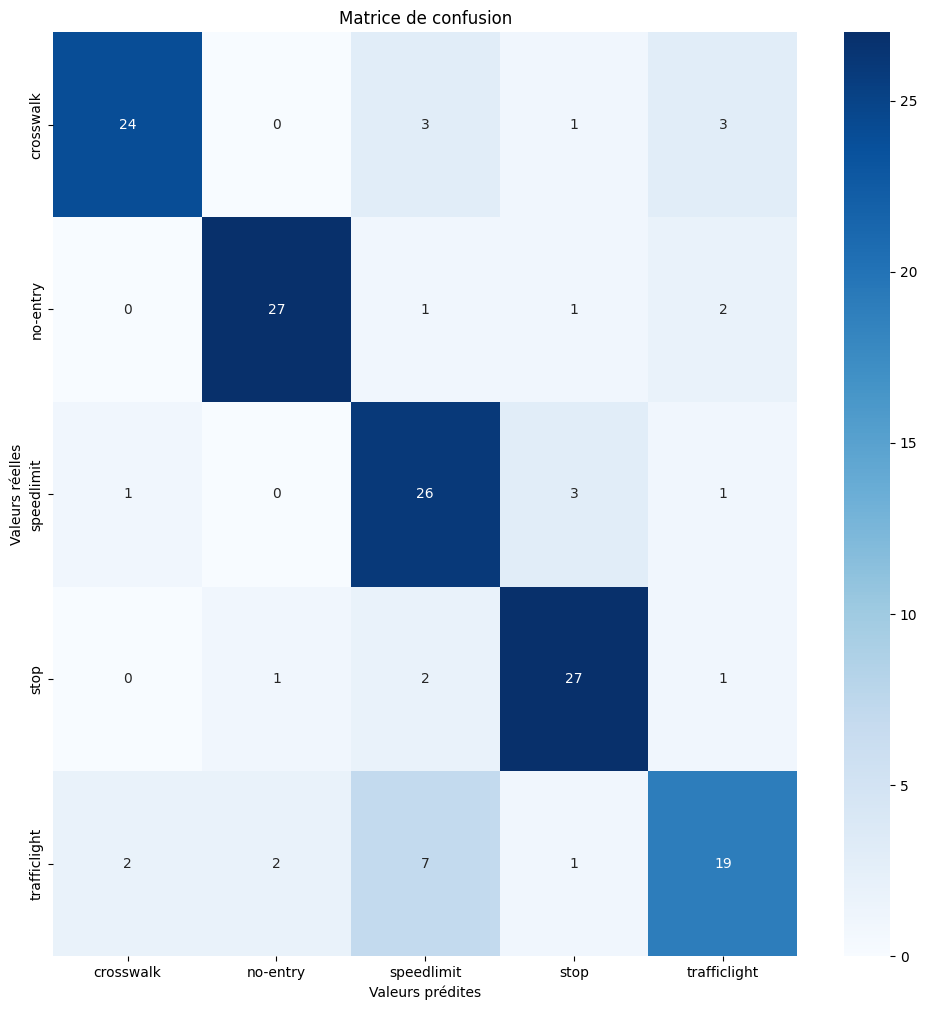

In [13]:
y_sigmoid = model.predict(x_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)
plot_confusion_matrix(y_test , y_pred ,figsize = (12,12) )

In [14]:
from sklearn.metrics import classification_report
# Obtenez le rapport de classification
class_report = classification_report(y_test, y_pred)

# Imprimez le rapport de classification
print(class_report)

              precision    recall  f1-score   support

         0.0       0.89      0.77      0.83        31
         1.0       0.90      0.87      0.89        31
         2.0       0.67      0.84      0.74        31
         3.0       0.82      0.87      0.84        31
         4.0       0.73      0.61      0.67        31

    accuracy                           0.79       155
   macro avg       0.80      0.79      0.79       155
weighted avg       0.80      0.79      0.79       155



In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

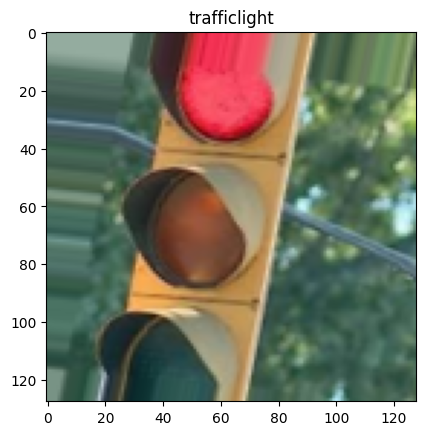

In [16]:
example_x, example_y = train_datagen.flow(x_train, y_train, batch_size=1).next()
example_x.shape
for i in range(0,1):
    plt.imshow(example_x[i])
    plt.title(labels[int(example_y[i])])
    plt.show()


In [17]:
from tensorflow import keras

checkpoint_filepath = "/models/best-model.keras"

early_stopping_callback =keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
)

bestmodel_callback = keras.callbacks.ModelCheckpoint(
                                filepath=  checkpoint_filepath,
                                monitor='val_sparse_categorical_accuracy',
                                mode='max',
                                save_best_only=True,
                                save_weights_only=True)

# Model weights are saved at the end of every epoch, if it's the best seen
# so far.

history = model.fit(train_datagen.flow(x_train, y_train, batch_size=10),
                    validation_data=(x_val, y_val),
                    epochs=50,
                    callbacks = [bestmodel_callback])


# The model weights (that are considered the best) can be loaded as -
model.load_weights(checkpoint_filepath)

Epoch 1/50
75/75 [==============================] - 6s 62ms/step - loss: 1.4105 - sparse_categorical_accuracy: 0.4798 - val_loss: 0.9648 - val_sparse_categorical_accuracy: 0.6429
Epoch 2/50
75/75 [==============================] - 3s 41ms/step - loss: 0.9677 - sparse_categorical_accuracy: 0.6402 - val_loss: 0.7372 - val_sparse_categorical_accuracy: 0.7857
Epoch 3/50
75/75 [==============================] - 3s 40ms/step - loss: 0.9190 - sparse_categorical_accuracy: 0.6577 - val_loss: 0.8090 - val_sparse_categorical_accuracy: 0.7273
Epoch 4/50
75/75 [==============================] - 4s 57ms/step - loss: 0.8892 - sparse_categorical_accuracy: 0.6739 - val_loss: 0.6490 - val_sparse_categorical_accuracy: 0.7792
Epoch 5/50
75/75 [==============================] - 3s 41ms/step - loss: 0.7873 - sparse_categorical_accuracy: 0.7102 - val_loss: 0.7469 - val_sparse_categorical_accuracy: 0.7403
Epoch 6/50
75/75 [==============================] - 3s 40ms/step - loss: 0.7643 - sparse_categorical_accu

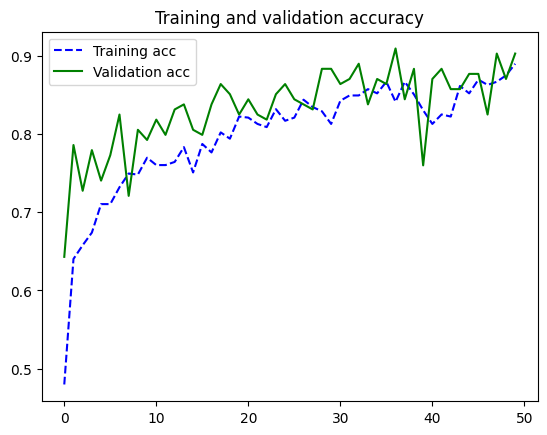

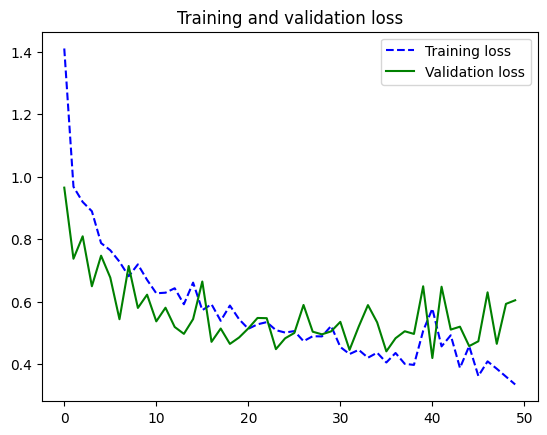

In [18]:
plot_training_analysis(history)

In [20]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss      : {:5.4f}'.format(score[0]))
print('Test accuracy  : {:5.4f}'.format(score[1]))

Test loss      : 0.4619
Test accuracy  : 0.8452


5/5 [==============================] - 0s 7ms/step


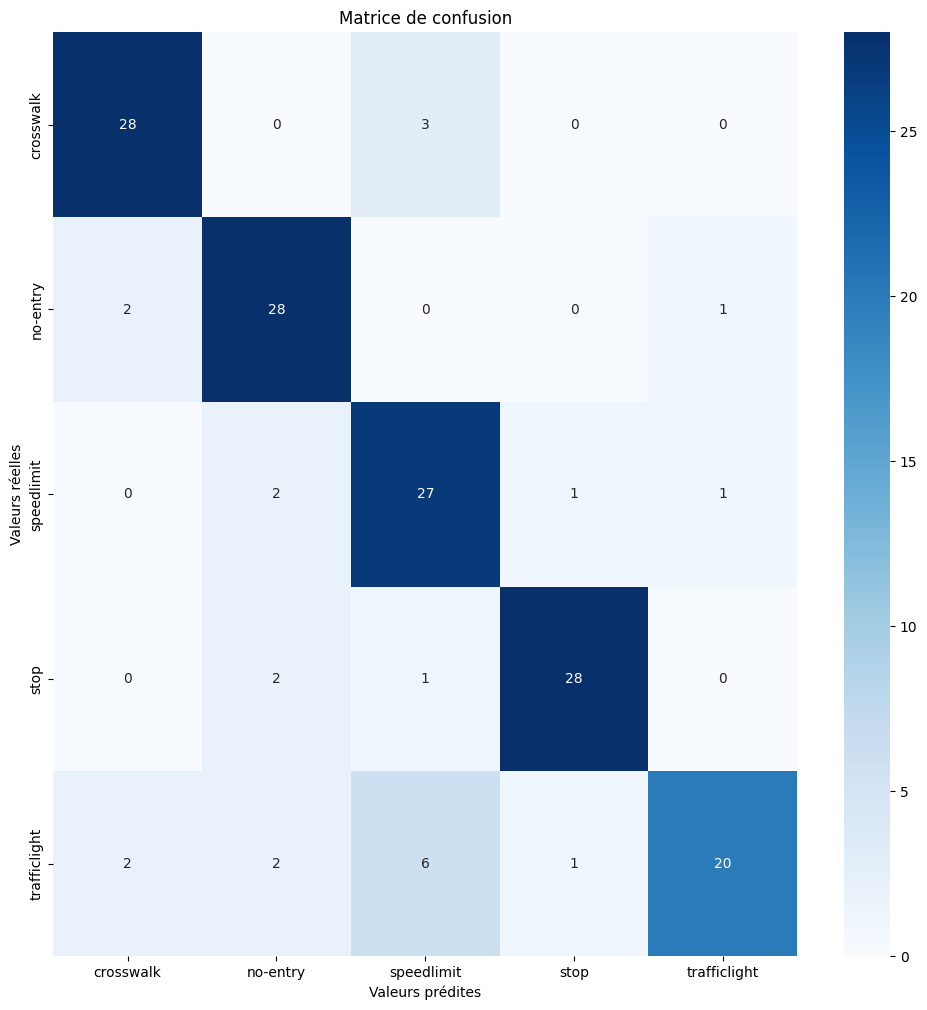

In [21]:
y_sigmoid = model.predict(x_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)
plot_confusion_matrix(y_test , y_pred ,figsize = (12,12) )

In [22]:
from sklearn.metrics import classification_report
# Obtenez le rapport de classification
class_report = classification_report(y_test, y_pred)

# Imprimez le rapport de classification
print(class_report)

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89        31
         1.0       0.82      0.90      0.86        31
         2.0       0.73      0.87      0.79        31
         3.0       0.93      0.90      0.92        31
         4.0       0.91      0.65      0.75        31

    accuracy                           0.85       155
   macro avg       0.85      0.85      0.84       155
weighted avg       0.85      0.85      0.84       155



## Fine-tuning

In [23]:
from tensorflow.keras.applications import VGG16

IMAGE_SIZE = 128

conv_base = VGG16(weights='imagenet', # On utilise les poids du réseau déjà pré-entrainé sur la base de données ImageNet
                  include_top=False, # On ne conserve pas la partie Dense du réseau originel
                  input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='ReLU'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
conv_base.trainable = False

bestmodel_callback = keras.callbacks.ModelCheckpoint(
                                filepath=  checkpoint_filepath,
                                monitor='val_sparse_categorical_accuracy',
                                mode='max',
                                save_best_only=True)

model.compile(optimizer=optimizers.Adam(learning_rate=3e-4),
              loss='sparse_categorical_crossentropy',  # Perte de l'entropie croisée
              metrics=[keras.metrics.SparseCategoricalAccuracy()])  # Métrique de précision


history = model.fit(train_datagen.flow(x_train, y_train, batch_size=10),
                    validation_data=(x_val, y_val),
                    epochs=10,
                    callbacks = [bestmodel_callback])

# The model weights (that are considered the best) can be loaded as -
model.load_weights(checkpoint_filepath)

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
75/75 [==============================] - 14s 149ms/step - loss: 1.2013 - sparse_categorical_accuracy: 0.5296 - val_loss: 0.7041 - val_sparse_categorical_accuracy: 0.7338
Epoch 2/10
75/75 [==============================] - 5s 69ms/step - loss: 0.7805 - sparse_categorical_accuracy: 0.7264 - val_loss: 0.6117 - val_sparse_categorical_accuracy: 0.8052
Epoch 3/10
75/75 [==============================] - 3s 45ms/step - loss: 0.6280 - sparse_categorical_accuracy: 0.7628 - val_loss: 0.5926 - val_sparse_categorical_accuracy: 0.7727
Epoch 4/10
75/75 [==============================] - 3s 46ms/step - loss: 0.6056 - sparse_categorical_accuracy: 0.7722 - val_loss: 0.7453 - val_sparse_categorical_accuracy: 0.7273
Epoch 5/10
75/75 [==============================] - 5s 66ms/step - loss: 0.5706 - sparse_categorical_accuracy: 0.7871 - val_loss: 0.5722 - val_sparse_categorical_accuracy: 0.8312
Epoch 6/10
75/75 [====================

In [24]:
conv_base.trainable = True
model.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',  # Perte de l'entropie croisée
              metrics=[keras.metrics.SparseCategoricalAccuracy()])  # Métrique de précision


history = model.fit(train_datagen.flow(x_train, y_train, batch_size=10),
                    validation_data=(x_val, y_val),
                    epochs=10,
                    callbacks = [bestmodel_callback])

# The model weights (that are considered the best) can be loaded as -
model.load_weights(checkpoint_filepath)

Epoch 1/10
75/75 [==============================] - 15s 100ms/step - loss: 0.3786 - sparse_categorical_accuracy: 0.8625 - val_loss: 0.5682 - val_sparse_categorical_accuracy: 0.8312
Epoch 2/10
75/75 [==============================] - 7s 89ms/step - loss: 0.3215 - sparse_categorical_accuracy: 0.8868 - val_loss: 0.4772 - val_sparse_categorical_accuracy: 0.8831
Epoch 3/10
75/75 [==============================] - 5s 69ms/step - loss: 0.2709 - sparse_categorical_accuracy: 0.8976 - val_loss: 0.4795 - val_sparse_categorical_accuracy: 0.8766
Epoch 4/10
75/75 [==============================] - 6s 86ms/step - loss: 0.2060 - sparse_categorical_accuracy: 0.9340 - val_loss: 0.5072 - val_sparse_categorical_accuracy: 0.9091
Epoch 5/10
75/75 [==============================] - 5s 66ms/step - loss: 0.2161 - sparse_categorical_accuracy: 0.9137 - val_loss: 0.4434 - val_sparse_categorical_accuracy: 0.9091
Epoch 6/10
75/75 [==============================] - 6s 76ms/step - loss: 0.1693 - sparse_categorical_ac

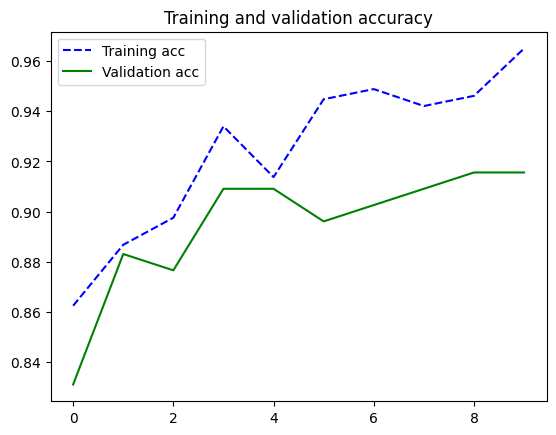

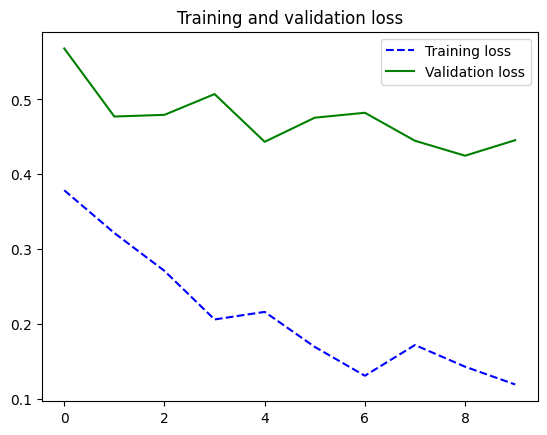

In [25]:
plot_training_analysis(history)

In [27]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss      : {:5.4f}'.format(score[0]))
print('Test accuracy  : {:5.4f}'.format(score[1]))

Test loss      : 0.2473
Test accuracy  : 0.9290


5/5 [==============================] - 0s 52ms/step


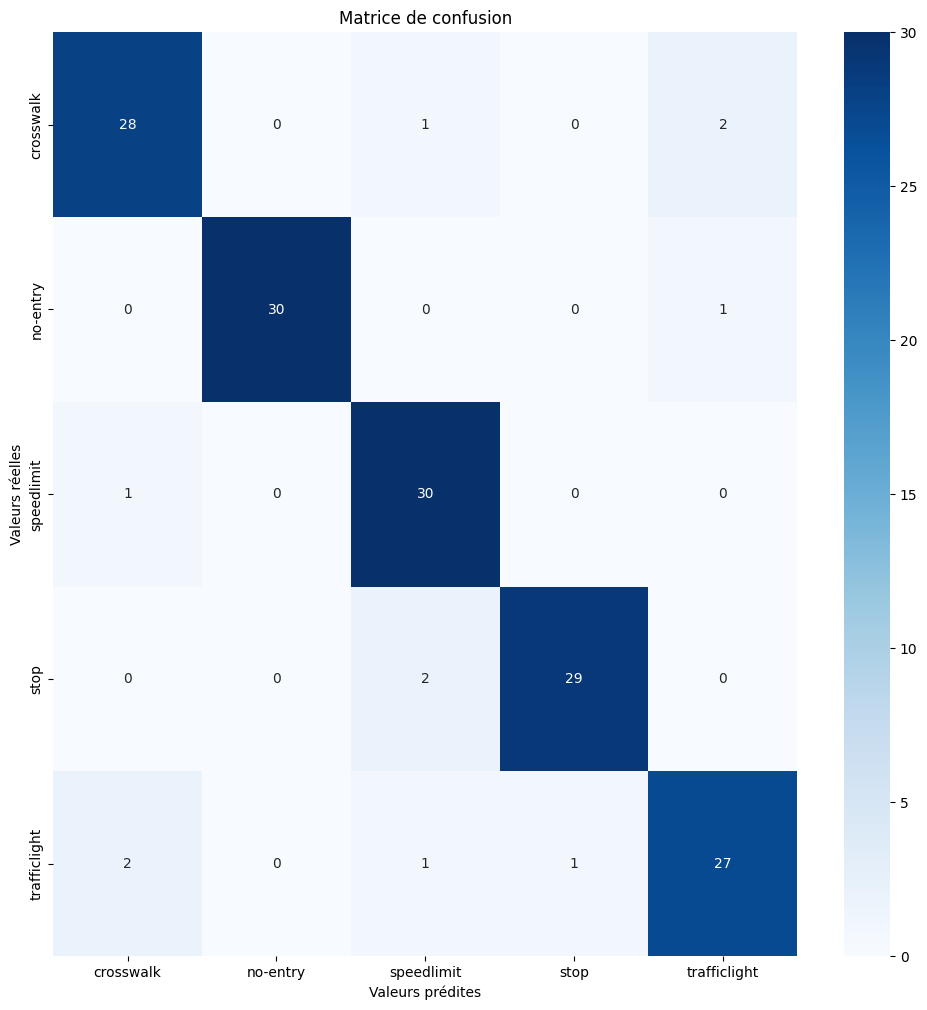

In [28]:
y_sigmoid = model.predict(x_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)
plot_confusion_matrix(y_test , y_pred ,figsize = (12,12) )

In [29]:
from sklearn.metrics import classification_report
# Obtenez le rapport de classification
class_report = classification_report(y_test, y_pred)

# Imprimez le rapport de classification
print(class_report)

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        31
         1.0       1.00      0.97      0.98        31
         2.0       0.88      0.97      0.92        31
         3.0       0.97      0.94      0.95        31
         4.0       0.90      0.87      0.89        31

    accuracy                           0.93       155
   macro avg       0.93      0.93      0.93       155
weighted avg       0.93      0.93      0.93       155



## Affichage des prédictions erronées


In [ ]:
# Obtenir les indices des prédictions erronées
incorrect_indices = np.where(y_pred != y_test)[0]

# Afficher les images correspondantes
plt.figure(figsize=(10, 10))
for i, incorrect in enumerate(incorrect_indices[:25]):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[incorrect], cmap='gray', interpolation='none')
    plt.title("P={}, T={}".format(labels[y_pred[incorrect].astype(np.uint8)], labels[y_test[incorrect].astype(np.uint8)]))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()